In [1]:
import dabench
from dabench import data, vector, observer
import matplotlib.pyplot as plt
import numpy as np

# 1. Basic stationary observer with random sampling

The first step is to define a data generator and generate/load data for the observer. Let's use a Lorenz63 generator as a basic starting point.

In [2]:
l63 = data.Lorenz63()
l63.generate(n_steps=50)

In [116]:
# Now we can define the observer:
obs_l63 = observer.Observer(
    l63, # Data generator object
    time_density = 0.5, # Probability of picking each time step for random sampling
    location_density = 0.5, # Probability of picking each location in l63.system_dim for random sampling
    error_bias = 0.0, # Mean for observation error, Gaussian/Normal distribution
    error_sd = 0.7, # Standard deviation for observation error, Gaussian/Normal distribution
    random_seed=99 # We can specify a random seed. Default is 99
)

# Making observations
obs_vec_l63 = obs_l63.observe()

In [117]:
# Let's examine that object
print('Sampling times: ', obs_vec_l63.times)
print('Number of observations: ', obs_vec_l63.num_obs)
# In this case, the entire system (3 values) was sampled at the specific timesteps
print('Number of locations at each timestep: ', obs_vec_l63.obs_dims[0])
print('Sampling location indices: ', obs_vec_l63.location_indices[0])
print('Observation values: ', obs_vec_l63.values)

Sampling times:  [0.   0.01 0.02 0.03 0.04 0.05 0.07 0.09 0.1  0.16 0.18 0.21 0.23 0.25
 0.26 0.27 0.28 0.29 0.36 0.38 0.39 0.42 0.43 0.44 0.45 0.47 0.48 0.49]
Number of observations:  28
Number of locations at each timestep:  3
Sampling location indices:  [0 1 2]
Observation values:  [[-10.29022197 -14.6652297   21.78198057]
 [-10.70399422 -15.24221531  21.87497932]
 [-11.3590443  -17.23021403  22.5388367 ]
 [-11.94659758 -16.10440398  25.58918674]
 [-11.743652   -16.28802944  26.00359202]
 [-13.33628749 -16.34825981  26.43800502]
 [-13.4576652  -14.53852602  30.95596079]
 [-12.80723389 -14.49595147  32.48152447]
 [-14.26203473 -14.97513481  33.45559073]
 [-12.58742549  -8.2080405   36.26861105]
 [-11.29188107  -5.47033545  35.43687007]
 [ -9.42099565  -4.06927011  35.34408839]
 [ -7.13261856  -2.89185728  33.44527143]
 [ -7.17752259  -1.32958974  31.72633161]
 [ -5.6414761   -0.78547545  30.32630106]
 [ -5.90705063  -1.0147493   29.627929  ]
 [ -5.34215848  -0.90483965  30.39700458]


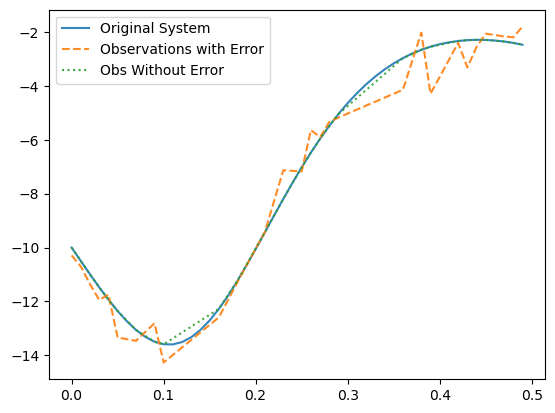

In [90]:
# Let's examine how error is added to observations
fig, ax = plt.subplots()
ax.plot(l63.times, l63.values[:, 0], alpha=0.9)
ax.plot(obs_vec_l63.times, obs_vec_l63.values[:, 0], '--', alpha=0.9)
obs_values_minus_error = obs_vec_l63.values - obs_vec_l63.errors
ax.plot(obs_vec_l63.times, obs_values_minus_error[:, 0], ':', alpha=0.9)
ax.legend(labels=['Original System', 'Observations with Error', 'Obs Without Error'])
plt.show()

# 2. Stationary observer with user-specified sampling times and locations

Last time, we let the observer randomly select locations and times to sample. But the observer also allows us to specify the location and time indices we want to observe. Let's explore that using a Lorenz96 generator.

In [2]:
l96 = data.Lorenz96()
l96.generate(n_steps=100)
print('Time dim: ', l96.time_dim)
print('System dim: ', l96.system_dim)

Time dim:  100
System dim:  36


In [3]:
# Let's sample 5 different points in the system every 5th timestep
time_inds_l96 = np.arange(0, 100, 5)
print(time_inds_l96)
sys_inds_l96 = [5, 10, 20, 25, 35]

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


In [6]:
# Set up observer using our specified sampling times/locations
obs_l96 = observer.Observer(
    l96, 
    time_indices = time_inds_l96, # Time indices to sample
    location_indices = sys_inds_l96, # Location indices to sample
    error_bias = 0.2,
    error_sd = 0.5 
)

# Making observations
obs_vec_l96 = obs_l96.observe()

In [7]:
# Let's examine that object
print('Sampling times: ', obs_vec_l96.times)
print('Number of observations: ', obs_vec_l96.num_obs)
print('Number of locations at each timestep: ', obs_vec_l96.obs_dims[0])
print('Sampling location indices: ', obs_vec_l96.location_indices[0])
print('Observation values: ', obs_vec_l96.values)
print('Mean Error: ', obs_vec_l96.errors.mean()) # Pretty close to the 0.2 we specified

Sampling times:  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75]
Number of observations:  20
Number of locations at each timestep:  5
Sampling location indices:  [ 5 10 20 25 35]
Observation values:  [[-2.04938935  2.47725879  0.59325828  2.18193221 -3.03160065]
 [-0.03638423  4.93167     6.70156755  1.04932555  0.4447102 ]
 [ 0.47293424  3.3932492   7.63980544  5.00867156  4.32050443]
 [ 2.65925276  4.58264575  4.15880754  2.27910625  6.29407343]
 [ 6.37575187  4.51183117 -1.11072219 -3.9522275   6.61628672]
 [ 1.45459642  1.94398106 -1.32837317  1.35165811  1.82872986]
 [-0.3428645   4.41978627  0.37919729  2.84734946 -0.09454631]
 [ 1.62970494  5.98047842  3.64155232  1.92799139  2.38752047]
 [ 5.14729101 -1.20996705  6.40263304  5.81342467  3.82966504]
 [ 6.59022233 -0.33427196  4.81476921  7.73738934  6.46179114]
 [ 6.71402348 -0.08630682  0.26178998  4.66546007  6.85299751]
 [ 1.72990204 -2.07068862  2.1550301  -4.87394118  4

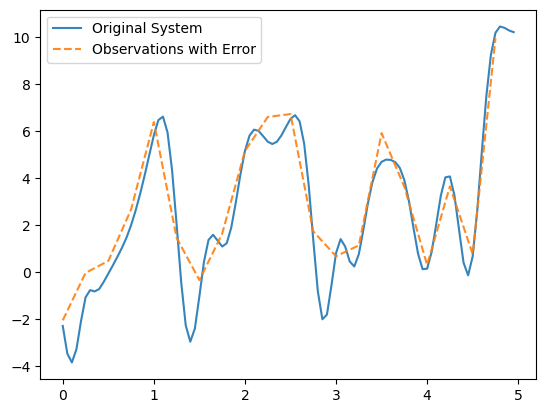

In [9]:
# Plot it against the original values
fig, ax = plt.subplots()
ax.plot(l96.times, l96.values[:, obs_vec_l96.location_indices[0, 0]], alpha=0.9)
ax.plot(obs_vec_l96.times, obs_vec_l96.values[:, 0], '--', alpha=0.9)
ax.legend(labels=['Original System', 'Observations with Error'])
plt.show()

# 3. Filtering observations by time

In some cases, once we've generated observations we might want to select all observations within a certiain time interval. Let's use the Lorenz96 observations we generated to show an example of this.

In [11]:
# Specify time interval, centered at 2 +/- 0.75
time_start = 2 - 0.75
time_end = 2 + 0.75
# Run filter and save as new obs vec
obs_vec_l96_filt = obs_vec_l96.filter_times(start=time_start, end=time_end, inclusive=True)
print('Observation times: ', obs_vec_l96_filt.times)
print('New number of obs: ', obs_vec_l96_filt.num_obs)

Observation times:  [1.25 1.5  1.75 2.   2.25 2.5  2.75]
New number of obs:  7


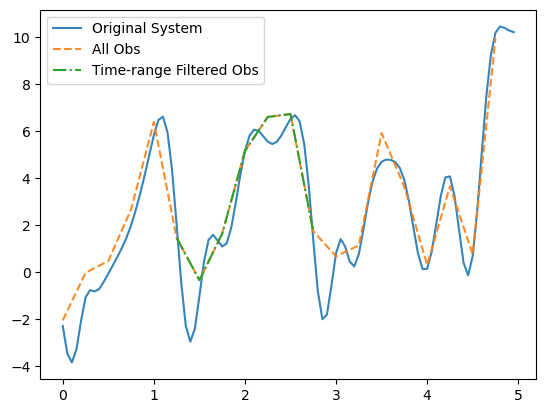

In [21]:
# Visualize
# Plot it against the original values
fig, ax = plt.subplots()
ax.plot(l96.times, l96.values[:, obs_vec_l96.location_indices[0, 0]], alpha=0.9)
ax.plot(obs_vec_l96.times, obs_vec_l96.values[:, 0], '--', alpha=0.9)
ax.plot(obs_vec_l96_filt.times, obs_vec_l96_filt.values[:, 0], '-.', alpha=1.0)
ax.legend(labels=['Original System', 'All Obs', 'Time-range Filtered Obs'])
plt.show()

# 4. Observer with locations in original coordinate dimensions

In the previous example, we specified locations to sample in the flattened, 1D space of the system's state vector. But for many data generators/loaders, the values originally exist in multi-dimensional space (e.g. latitudue, longitude, vertical level) before being flattened into a state vector. DataAssimBench's Observer class can take location indices in this original_dim instead. Let's create observations from some ERA5 data downloaded from Amazon Web Services. 

In [15]:
aws = data.AWS()
aws.load()
print('Time dim: ', aws.time_dim)
print('System dim: ',aws.system_dim)
print('Original dim: ', aws.original_dim)

Time dim:  8784
System dim:  559
Original dim:  (13, 43)


In [16]:
# Let's sample every 500 timesteps
time_inds_aws = np.arange(0, aws.time_dim, 500)
# Let's pick indices at the corners and roughly center of the system
loc_inds_aws= np.array([[0, 0], [12, 0], [12, 42], [0, 42], [6, 21]])

In [17]:
# Set up observer using our specified sampling times/locations
obs_aws = observer.Observer(
    aws, 
    time_indices = time_inds_aws, # Time indices to sample
    location_indices = loc_inds_aws, # Location indices to sample
    error_bias = 0.0, # No error this time
    error_sd = 0.0
)

# Making observations
obs_vec_aws = obs_aws.observe()

In [23]:
# Let's examine that object
print('Sampling times: ', obs_vec_aws.times)
print('Number of observations: ', obs_vec_aws.num_obs)
print('Number of locations at each timestep: ', obs_vec_aws.obs_dims[0])
print('Sampling location indices: ', obs_vec_aws.location_indices[0])
print('Observation values: ', obs_vec_aws.values)
print('Errors: ', obs_vec_aws.errors)

Sampling times:  ['2020-01-01T00:00:00.000000000' '2020-01-21T20:00:00.000000000'
 '2020-02-11T16:00:00.000000000' '2020-03-03T12:00:00.000000000'
 '2020-03-24T08:00:00.000000000' '2020-04-14T04:00:00.000000000'
 '2020-05-05T00:00:00.000000000' '2020-05-25T20:00:00.000000000'
 '2020-06-15T16:00:00.000000000' '2020-07-06T12:00:00.000000000'
 '2020-07-27T08:00:00.000000000' '2020-08-17T04:00:00.000000000'
 '2020-09-07T00:00:00.000000000' '2020-09-27T20:00:00.000000000'
 '2020-10-18T16:00:00.000000000' '2020-11-08T12:00:00.000000000'
 '2020-11-29T08:00:00.000000000' '2020-12-20T04:00:00.000000000']
Number of observations:  18
Number of locations at each timestep:  5
Sampling location indices:  [[ 0  0]
 [12  0]
 [12 42]
 [ 0 42]
 [ 6 21]]
Observation values:  [[297.25   299.5625 299.625  298.375  299.5625]
 [293.5    296.5    298.6875 297.125  298.375 ]
 [298.25   299.6875 298.9375 298.5    298.5625]
 [297.9375 299.375  297.8125 296.5625 296.8125]
 [299.0625 298.6875 297.5625 297.3125 297

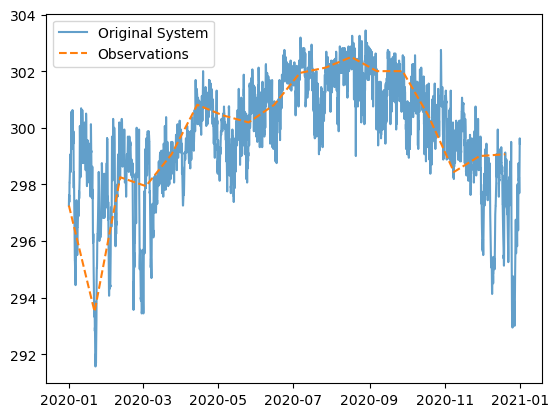

In [19]:
# Visualize
# Recall that there is no error, but our sampling is pretty infrequent compared to the actual system
# Plot it against the original values
fig, ax = plt.subplots()
ax.plot(aws.times, aws.values_gridded[:, 0, 0], alpha=0.7)
ax.plot(obs_vec_aws.times, obs_vec_aws.values[:, 0], '--', alpha=1.0)
ax.legend(labels=['Original System', 'Observations'])
plt.show()

In [20]:
# Even though these times are datetimes, we can filter our observations by time
# by using np.datetime objects.
# Let's get all observations between June 1st and September 1st:
time_start = np.datetime64('2020-06-01')
time_end = np.datetime64('2020-09-01')
# Run filter and save as new obs vec
obs_vec_aws_filt = obs_vec_aws.filter_times(start=time_start, end=time_end, inclusive=True)
print('Observation times: ', obs_vec_aws_filt.times)
print('New number of obs: ', obs_vec_aws_filt.num_obs)

Observation times:  ['2020-06-15T16:00:00.000000000' '2020-07-06T12:00:00.000000000'
 '2020-07-27T08:00:00.000000000' '2020-08-17T04:00:00.000000000']
New number of obs:  4


# 5. Non-Stationary Observer

In most cases, it's simplest to assume the observers are stationary and that we are sampling at the same location at each timestep. However, Observer allows for non-stationary observers as well, sampling different locations over time. We'll create a new set of observations from the AWS data as an example.

In [30]:
# Set up observer using our specified sampling times/locations
obs_aws_ns = observer.Observer(
    aws, 
    time_density = 0.002,
    location_density = 0.05,
    error_bias = 0.0,
    error_sd = 3.0,
    stationary_observers=False
)

# Making observations
obs_vec_aws_ns = obs_aws_ns.observe()

In [32]:
print('Sampling times: ', obs_vec_aws_ns.times)
print('Number of observations: ', obs_vec_aws_ns.num_obs)
print('Number of locations at each timestep: ', obs_vec_aws_ns.obs_dims)
print('Sampling location indices at first timestep: ', obs_vec_aws_ns.location_indices[0])
print('Sampling location indices at last timestep: ', obs_vec_aws_ns.location_indices[-1])


Sampling times:  ['2020-01-05T19:00:00.000000000' '2020-01-20T03:00:00.000000000'
 '2020-01-21T18:00:00.000000000' '2020-01-28T03:00:00.000000000'
 '2020-02-11T08:00:00.000000000' '2020-03-15T02:00:00.000000000'
 '2020-04-18T03:00:00.000000000' '2020-05-09T15:00:00.000000000'
 '2020-05-24T20:00:00.000000000' '2020-05-27T16:00:00.000000000'
 '2020-06-08T16:00:00.000000000' '2020-07-23T14:00:00.000000000'
 '2020-10-10T06:00:00.000000000' '2020-10-31T00:00:00.000000000'
 '2020-11-02T12:00:00.000000000' '2020-11-03T23:00:00.000000000']
Number of observations:  16
Number of locations at each timestep:  [28 26 32 20 23 28 35 30 29 41 35 27 23 23 36 26]
Sampling location indices at first timestep:  [ 17  22  30  35  52  63  88 106 123 128 154 176 184 212 224 243 286 306
 310 411 425 441 448 458 470 477 536 541]
Sampling location indices at last timestep:  [ 47  62  69 105 108 126 151 157 167 186 208 216 241 247 292 293 320 347
 349 360 389 398 410 435 512 540]
